In [1]:
# Copy from
# http://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

In [2]:
#-------------------------------------
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
print('dataframe', dataframe.shape)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print('train/test',train.shape, test.shape)

dataframe (144, 1)
train/test (96, 1) (48, 1)


In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print('train x/y + test x/y',trainX.shape, trainY.shape, testX.shape, testY.shape)

train x/y + test x/y (92, 3) (92,) (44, 3) (44,)


In [5]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
0s - loss: 56045.2964
Epoch 2/100
0s - loss: 35501.6417
Epoch 3/100
0s - loss: 22937.7171
Epoch 4/100
0s - loss: 12260.9112
Epoch 5/100
0s - loss: 5375.7001
Epoch 6/100
0s - loss: 2165.0638
Epoch 7/100
0s - loss: 1242.3028
Epoch 8/100
0s - loss: 1095.9341
Epoch 9/100
0s - loss: 1072.8205
Epoch 10/100
0s - loss: 1063.4296
Epoch 11/100
0s - loss: 1049.4932
Epoch 12/100
0s - loss: 1057.4532
Epoch 13/100
0s - loss: 1052.4514
Epoch 14/100
0s - loss: 1047.0288
Epoch 15/100
0s - loss: 1045.4649
Epoch 16/100
0s - loss: 1037.5983
Epoch 17/100
0s - loss: 1044.8115
Epoch 18/100
0s - loss: 1042.4509
Epoch 19/100
0s - loss: 1078.4533
Epoch 20/100
0s - loss: 1047.2542
Epoch 21/100
0s - loss: 1032.3401
Epoch 22/100
0s - loss: 1047.4466
Epoch 23/100
0s - loss: 1064.0334
Epoch 24/100
0s - loss: 1025.0691
Epoch 25/100
0s - loss: 1021.3757
Epoch 26/100
0s - loss: 1029.8054
Epoch 27/100
0s - loss: 1008.6262
Epoch 28/100
0s - loss: 1018.9446
Epoch 29/100
0s - loss: 996.1035
Epoch 30/100
0s - lo

In [6]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Train Score: 641.10 MSE (25.32 RMSE)
Test Score: 2862.30 MSE (53.50 RMSE)


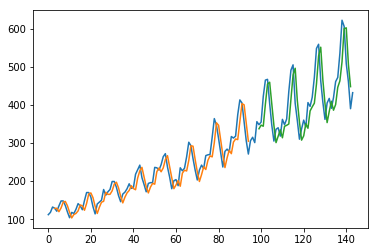

In [7]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()